## Imports and downloads

In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Only execute if missing from data
!git clone https://github.com/Minqi824/ADBench.git data

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from copy import deepcopy

# for neural network
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

In [8]:
import os
path_to_project = '/content/drive/MyDrive/MAE_projection'
os.chdir(path_to_project)

In [11]:
%run scripts/masking_experiments.py

test


In [3]:
from modules import models, data_f

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'device: {device}')

device: cpu


## Prepare data

### Read data

In [5]:
# Read the data.
data = np.load('data/ADBench/adbench/datasets/Classical/2_annthyroid.npz', allow_pickle=True)
X, y = data['X'], data['y']

num_samples, num_channels = X.shape
print('number of samples:', num_samples)
print('number of channels:', num_channels)

# Mask one of the values.
mask = np.random.randint(0,num_channels,num_samples)
print((mask==1).sum())
X_masked = X.copy()
X_masked[np.arange(num_samples), mask] = -1

# Add the mask indices as an extra channel to X.
X_masked = np.hstack((X_masked, mask[:,None]))
# print('number of channels:', X_masked.shape[1])

number of samples: 7200
number of channels: 6
1172


### Create dataloader

In [6]:
dataloaders = data_f.get_loaders(X_masked, X)

## Auto Encoder

### Define model

In [ ]:
model = models.AutoEnc()

optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.MSELoss()

### Define evaluation function

Root Mean Square Error before training

In [ ]:
predictions = models.evaluate(model, X_masked)
rmse = np.sqrt(np.mean((predictions - X)**2))
print(rmse)

  0%|          | 0/7200 [00:00<?, ?it/s]

0.461936521147473


### Define and run the train loop

training model


  0%|          | 0/10 [00:00<?, ?it/s]

train:   0%|          | 0/57 [00:00<?, ?it/s]

epoch: 1  | train loss: 0.187, 

train:   0%|          | 0/57 [00:00<?, ?it/s]

epoch: 2  | train loss: 0.130, 

train:   0%|          | 0/57 [00:00<?, ?it/s]

epoch: 3  | train loss: 0.090, 

train:   0%|          | 0/57 [00:00<?, ?it/s]

epoch: 4  | train loss: 0.063, 

train:   0%|          | 0/57 [00:00<?, ?it/s]

epoch: 5  | train loss: 0.045, 

train:   0%|          | 0/57 [00:00<?, ?it/s]

epoch: 6  | train loss: 0.032, 

train:   0%|          | 0/57 [00:00<?, ?it/s]

epoch: 7  | train loss: 0.024, 

train:   0%|          | 0/57 [00:00<?, ?it/s]

epoch: 8  | train loss: 0.018, 

train:   0%|          | 0/57 [00:00<?, ?it/s]

epoch: 9  | train loss: 0.014, 

train:   0%|          | 0/57 [00:00<?, ?it/s]

epoch: 10  | train loss: 0.012, Finished Training


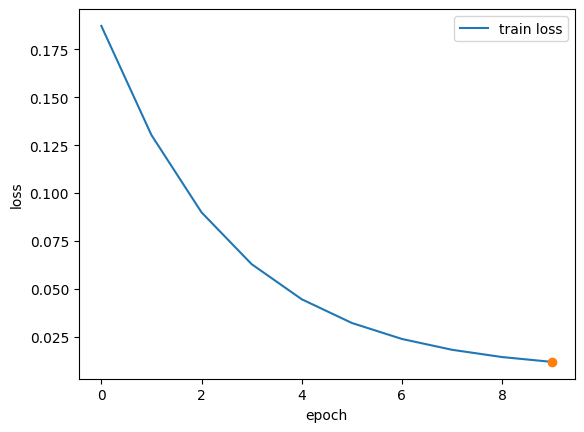

In [ ]:
best_params, end_params = models.train_model(model, criterion, optimizer, dataloaders, epochs=10)

In [ ]:
model.load_state_dict(best_params)

<All keys matched successfully>

### Test

Root Mean Square Error before training

In [ ]:
predictions = models.evaluate(model, X_masked)
rmse = np.sqrt(np.mean((predictions - X)**2))
print(rmse)

  0%|          | 0/7200 [00:00<?, ?it/s]

0.10446915171106422
